# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: *{Muratova Anna}*</center>

#### <hr /> General Information

**Due Date:** 03.04.2016 23:59  <br \>
**Late submission policy:** the task will not be graded!  <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called Markov Cluster Algorithm (MCL).
Implement Markor Clustering Algorithm
Input: Transition matrix T=D−1AT=D−1A
Output: Adjacency matrix M∗M∗
1.	Set M=TM=T
2.	repeat:
    A.	Expansion Step: M=MpM=Mp (usually p=2p=2)
    B.	Inflation Step: Raise every entry of MM to the power αα (usualy α=2α=2)
    C.	Renormalize: Normalize each row by its sum
    D.	Prunning: Replace entries that are close to 00 by pure 00
3.	until MM converges
4.	M∗=MM∗=M
As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix.
•	Run this method for network 1, 2 and 3.
•	Play with the parameters (pp, αα, zero tolerance), analyse the results


### <hr /> Code of program

In [ ]:
#-*- coding: latin-1 -*-

import numpy as np
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt

def normalize(A):
    column_sums = A.sum(axis=0)
    new_matrix = A / column_sums[np.newaxis, :]
    return new_matrix

def inflate(A, inflate_factor):
    return normalize(np.power(A, inflate_factor))

def expand(A, expand_factor):
    return np.linalg.matrix_power(A, expand_factor)

def add_diag(A, mult_factor):
    return A + mult_factor * np.identity(A.shape[0])

def get_clusters(A):
    clusters = []
    for i, r in enumerate((A>0).tolist()):
        if r[i]:
            clusters.append(A[i,:]>0)

    clust_map  ={}
    for cn , c in enumerate(clusters):
        for x in  [ i for i, x in enumerate(c) if x ]:
            clust_map[cn] = clust_map.get(cn, [])  + [x]
    return clust_map

def draw(G, A, cluster_map):
    clust_map = {}
    for k, vals in cluster_map.items():
        for v in vals:
            clust_map[v] = k

    colors = []
    for i in range(len(G.nodes())):
        colors.append(clust_map.get(i, 100))

    pos = nx.spring_layout(G)
    
    plt.figure(2)
    
    from matplotlib.pylab import show
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color=colors, cmap=plt.cm.Blues )
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    show()

def mcl(M, expand_factor, inflate_factor, max_loop, mult_factor):
    M = add_diag(M, mult_factor)
    M = normalize(M)

    for i in range(max_loop):
        M = inflate(M, inflate_factor)
        M = expand(M, expand_factor)

    clusters = get_clusters(M)
    return M, clusters

  
print "======================================================="
print "    HA-4    Task-1    Muratova Anna"
print "======================================================="
print "Community detection by Markov Clustering Algorithm (MCL)"
print "======================================================="

for net in ['network1', 'network2', 'network3']:
    data = scipy.io.loadmat(net + '.mat')
    print net + '.mat', "Data Structure:"
    print scipy.io.whosmat(net + '.mat')
    print "======================================================="
    A = data['A']
    #community = data['Comm']
    #print A    
    #print "---------------------"

    G = nx.from_numpy_matrix(A)

    expand_factor = 2
    inflate_factor = 2
    mult_factor = 1
    
    for max_loop in [10, 100, 1000]:
        print "max_loop =", max_loop
        M, clusters = mcl(A, expand_factor, inflate_factor, max_loop, mult_factor)    
        draw(G, M, clusters)
        print "======================================================="

### <hr /> Result

In [ ]:
=======================================================
    HA-4    Task-1    Muratova Anna
=======================================================
Community detection by Markov Clustering Algorithm (MCL)
=======================================================
network1.mat Data Structure:
[('A', (128, 128), 'logical'), ('Comm', (128, 1), 'double')]
=======================================================

max_loop = 10

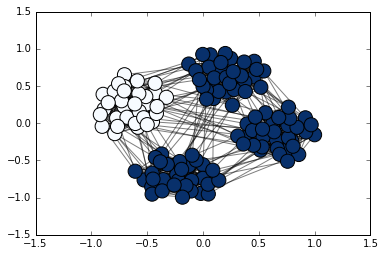

In [11]:
from IPython.display import Image
Image(filename='i1.png')

max_loop = 100

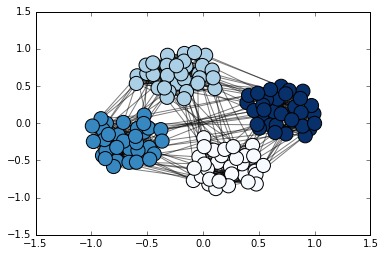

In [12]:
from IPython.display import Image
Image(filename='i2.png')

max_loop = 1000

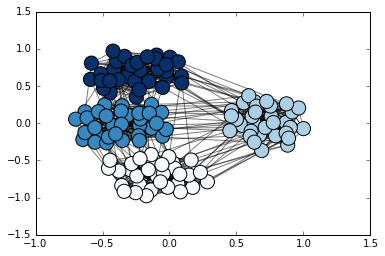

In [13]:
from IPython.display import Image
Image(filename='i3.png')

In [ ]:
=======================================================
network2.mat Data Structure:
[('A', (128, 128), 'logical'), ('Comm', (128, 1), 'double')]
=======================================================

max_loop = 10

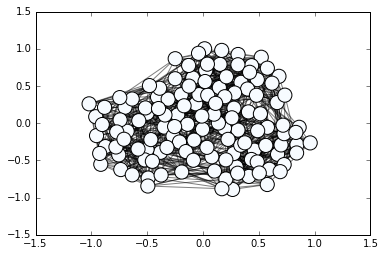

In [14]:
from IPython.display import Image
Image(filename='i4.png')

max_loop = 100

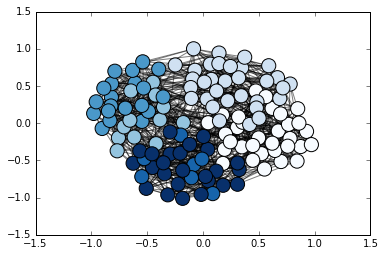

In [15]:
from IPython.display import Image
Image(filename='i5.png')

max_loop = 1000

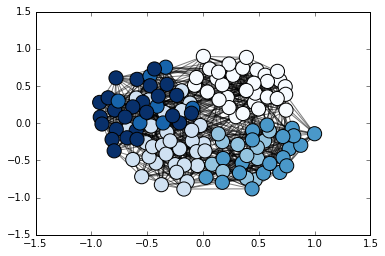

In [16]:
from IPython.display import Image
Image(filename='i6.png')

In [ ]:
=======================================================
network3.mat Data Structure:
[('A', (128, 128), 'logical'), ('Comm', (128, 1), 'double')]
=======================================================

max_loop = 10

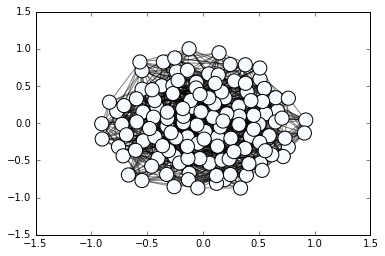

In [17]:
from IPython.display import Image
Image(filename='i7.png')

max_loop = 100

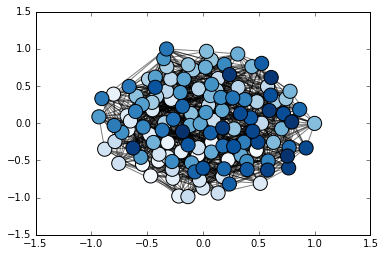

In [18]:
from IPython.display import Image
Image(filename='i8.png')

max_loop = 1000

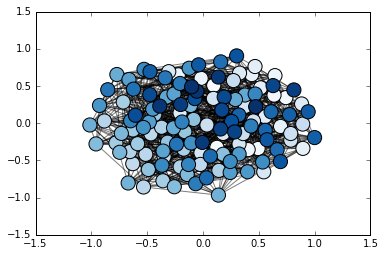

In [19]:
from IPython.display import Image
Image(filename='i9.png')

### <hr /> Conclusion

Pictures are shown for the expand_factor = 2, inflate_factor = 2 and mult_factor = 1, which gave the best result. 

Program also was runnung with other parameters values, but it made results worse. 

Also max_loop parameter was changed from 10 to 100 and 1000. Results show that for network2 we have a little improved clusterization when increasing max_loop.

### <hr /> Task 2

Load Yahoo Music network. Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.
•	Implement multilevel spectral recursive partitioning algorithm that was described during the lecture
•	Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)
You can load .mat files with the following commands:
In [ ]:
import scipy.io
data = scipy.io.loadmat('music_data.mat')


### <hr /> Code of program

In [ ]:
#-*- coding: latin-1 -*-
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt

def spectral():                 # Recursive Clustering Function
    global n, L
    
    print "Recursive call. Total Clusters =", len(L)        
    a=''
    for i in xrange(len(L)):
        a += str(len(L[i])) + '  '
    print "Cluster sizes :", a
    
    G = L.pop()
    F = nx.fiedler_vector(G)
    F.sort()

    j = 0
    for i in xrange(len(F)-1):  # search for sign change
        if F[i] >= 0:
            j = i
            break

    GS = nx.spectral_ordering(G)
    GL = GS[:j]                 # First subgraph node list
    GR = GS[j:]                 # Second subgraph node list

    if j > len(F)/2:            # Bigger cluster first
        L.insert(0, G.subgraph(GL)) 
        L.insert(0, G.subgraph(GR)) 
    else:
        L.insert(0, G.subgraph(GR)) 
        L.insert(0, G.subgraph(GL)) 
        
    if len(L) < n:
        spectral()              # Recursive call
    
    return L

  
print "======================================================="
print "    HA-4    Task-2    Muratova Anna"
print "======================================================="
print "Multilevel spectral recursive partitioning algorithm"
print "======================================================="
""" Yahoo Music network. 
    Edges in this network appear if enough number of users 
    have given ratings to both music bands. 
    Edges are weighted with similarity of the ratings.
    Implement multilevel spectral recursive partitioning algorithm. 
    Visualize community structure of the network 
    and output some of the dense clusters. 
"""
data = scipy.io.loadmat('music_data.mat')
print "Data Structure:"
print scipy.io.whosmat('music_data.mat')
print "======================================================="
A = data['A']
names = data['artists']
#print A
#print names
G = nx.from_scipy_sparse_matrix(A)
#nx.draw(G, pos=nx.spectral_layout(G), node_color='b')    
#plt.show()

L = [G]             # List of Clusters
n = 10              # Max Number of Clusters = Number of Recursive Levels

spectral()          # Recursive Function Call

print "Max number of clusters reached. Total Clusters =", len(L)        
a=''
for i in xrange(len(L)):
    a += str(len(L[i])) + '  '
print "Cluster sizes :", a
print "======================================================="

colors = 10*'rgbycm' 
for i in xrange(len(L)):
    nx.draw(L[i], pos=nx.spring_layout(L[i]), node_color=colors[i])
    plt.title("Cluster of " + str(len(L[i])) + " nodes")
    plt.show()


### <hr /> Result

In [ ]:

=======================================================
    HA-4    Task-2    Muratova Anna
=======================================================
Multilevel spectral recursive partitioning algorithm
=======================================================
Data Structure:
[('A', (9276, 9276), 'sparse'), ('artists', (9276,), 'char')]
=======================================================
Recursive call. Total Clusters = 1
Cluster sizes : 9276  
Recursive call. Total Clusters = 2
Cluster sizes : 1807  7469  
Recursive call. Total Clusters = 3
Cluster sizes : 479  6990  1807  
Recursive call. Total Clusters = 4
Cluster sizes : 486  1321  479  6990  
Recursive call. Total Clusters = 5
Cluster sizes : 1283  5707  486  1321  479  
Recursive call. Total Clusters = 6
Cluster sizes : 161  318  1283  5707  486  1321  
Recursive call. Total Clusters = 7
Cluster sizes : 598  723  161  318  1283  5707  486  
Recursive call. Total Clusters = 8
Cluster sizes : 132  354  598  723  161  318  1283  5707  
Recursive call. Total Clusters = 9
Cluster sizes : 1884  3823  132  354  598  723  161  318  1283  
Max number of clusters reached. Total Clusters = 10
Cluster sizes : 416  867  1884  3823  132  354  598  723  161  318  
=======================================================

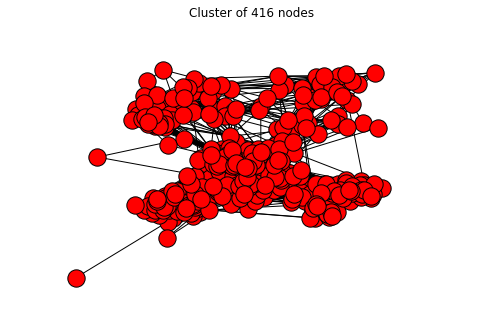

In [1]:
from IPython.display import Image
Image(filename='im1.png')

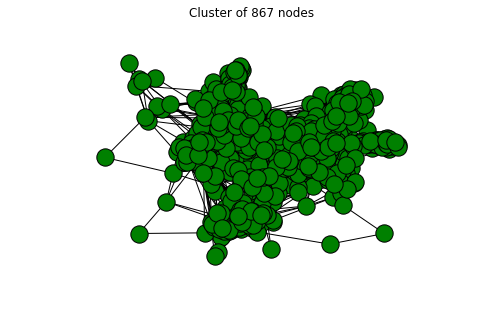

In [2]:
from IPython.display import Image
Image(filename='im2.png')

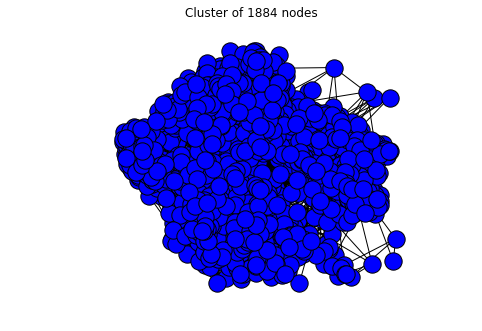

In [3]:
from IPython.display import Image
Image(filename='im3.png')

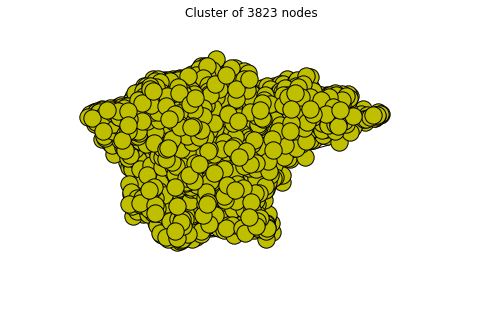

In [4]:
from IPython.display import Image
Image(filename='im4.png')

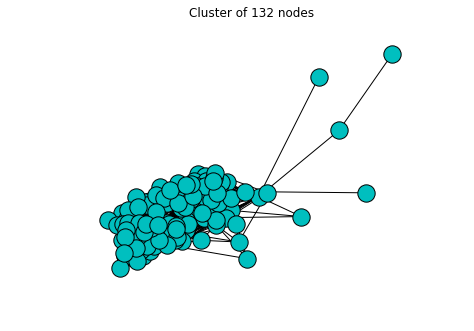

In [5]:
from IPython.display import Image
Image(filename='im5.png')

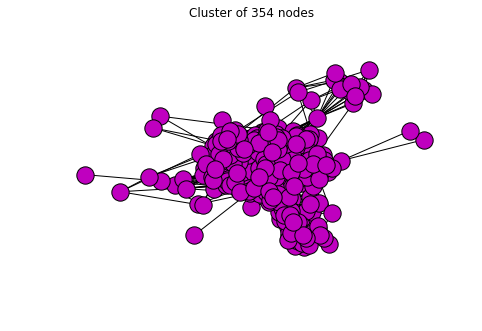

In [6]:
from IPython.display import Image
Image(filename='im6.png')

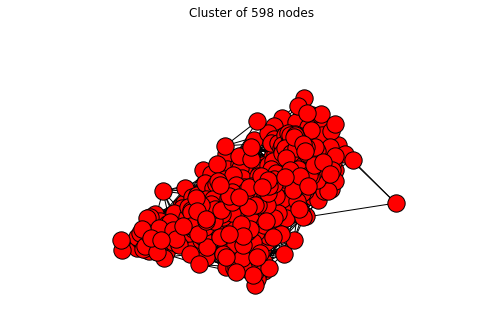

In [7]:
from IPython.display import Image
Image(filename='im7.png')

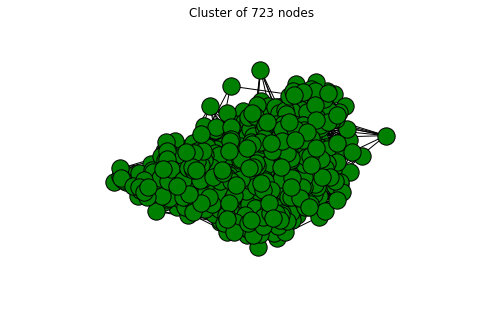

In [8]:
from IPython.display import Image
Image(filename='im8.png')

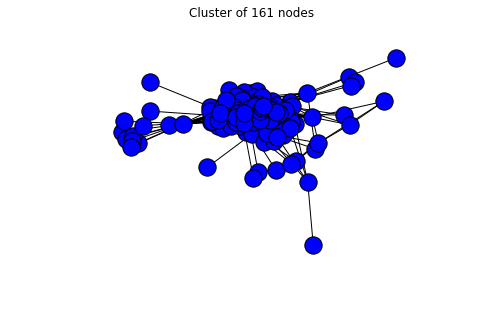

In [9]:
from IPython.display import Image
Image(filename='im9.png')

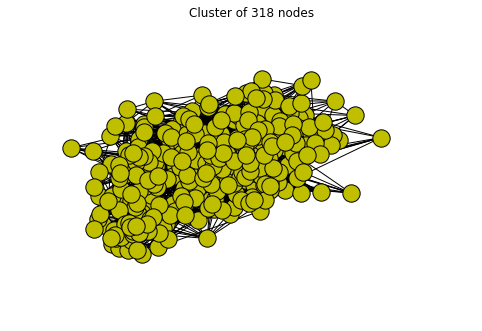

In [10]:
from IPython.display import Image
Image(filename='im10.png')

### <hr /> Conclusion

Program uses multilevel spectral recursive partitioning algorithm for clusterization. The number of clusters was defined as 10. Recursive function spectral(). For each recursive call the function divide graph into two subgraphs according to Fiedler vector. Nodes corresponding to negative values of Fiedler vector were placed to first subgraph and nodes corresponding to positive values were placed into second subgraph. And so on. Networkx library functions used in the program: fiedler_vector(G), spectral_ordering(G), G.subgraph(GL).